# LOADING THE DATASET

In [ ]:
import numpy as np 
import pandas as pd 


In [ ]:
#loading the dataset
df = pd.read_csv("student_performance_predictionraw.csv")

In [ ]:
df

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
0,S00001,12.5,NaN,75.0,Yes,Master,Yes
1,S00002,9.3,95.3,60.6,No,High School,No
2,S00003,13.2,NaN,64.0,No,Associate,No
3,S00004,17.6,76.8,62.4,Yes,Bachelor,No
4,S00005,8.8,89.3,72.7,No,Master,No
...,...,...,...,...,...,...,...
39995,S39996,15.6,93.8,51.4,Yes,Master,No
39996,S39997,11.3,66.4,64.2,No,Doctorate,Yes
39997,S39998,13.1,65.6,38.1,No,Bachelor,No
39998,S39999,14.1,74.9,NaN,Yes,Master,No


# DATA EXPLORATION AND MANIPULATION

In [ ]:
# Check for missing values
df.isnull().sum()

Student ID                                        0
Study Hours per Week                           1995
Attendance Rate                                1992
Previous Grades                                1994
Participation in Extracurricular Activities    2000
Parent Education Level                         2000
Passed                                         2000
dtype: int64

In [ ]:
# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

In [ ]:
# Fill numerical missing values with mean
for col in numerical_cols:
    df[col].fillna(df[col].mean(), inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_10144\1244376879.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [ ]:
# Fill categorical missing values with mode
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_10144\4163500836.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [ ]:
# Confirm missing errors has been sorted out
print(df.isnull().sum())


Student ID                                     0
Study Hours per Week                           0
Attendance Rate                                0
Previous Grades                                0
Participation in Extracurricular Activities    0
Parent Education Level                         0
Passed                                         0
dtype: int64


In [ ]:
df

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
0,S00001,12.5,75.276323,75.000000,Yes,Master,Yes
1,S00002,9.3,95.300000,60.600000,No,High School,No
2,S00003,13.2,75.276323,64.000000,No,Associate,No
3,S00004,17.6,76.800000,62.400000,Yes,Bachelor,No
4,S00005,8.8,89.300000,72.700000,No,Master,No
...,...,...,...,...,...,...,...
39995,S39996,15.6,93.800000,51.400000,Yes,Master,No
39996,S39997,11.3,66.400000,64.200000,No,Doctorate,Yes
39997,S39998,13.1,65.600000,38.100000,No,Bachelor,No
39998,S39999,14.1,74.900000,65.440107,Yes,Master,No


In [ ]:
# check for information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 7 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Student ID                                   40000 non-null  object 
 1   Study Hours per Week                         40000 non-null  float64
 2   Attendance Rate                              40000 non-null  float64
 3   Previous Grades                              40000 non-null  float64
 4   Participation in Extracurricular Activities  40000 non-null  object 
 5   Parent Education Level                       40000 non-null  object 
 6   Passed                                       40000 non-null  object 
dtypes: float64(3), object(4)
memory usage: 2.1+ MB


In [ ]:
# Remove the spaces on the column names and make them lowercase
df.columns = df.columns.str.replace(' ','_').str.lower()

In [ ]:
# confirm the above code has been applied
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 7 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   student_id                                   40000 non-null  object 
 1   study_hours_per_week                         40000 non-null  float64
 2   attendance_rate                              40000 non-null  float64
 3   previous_grades                              40000 non-null  float64
 4   participation_in_extracurricular_activities  40000 non-null  object 
 5   parent_education_level                       40000 non-null  object 
 6   passed                                       40000 non-null  object 
dtypes: float64(3), object(4)
memory usage: 2.1+ MB


In [ ]:
#identify target columns
import streamlit as st
if 'passed' in df.columns:
    target_col = 'passed'
else:
    target_col = st.sidebar.selectbox('Select Target Column', df.columns)

In [ ]:
#checking the unique values of categorical features
print(f'the unique value of the passed column is {df['passed'].unique()}')
print(f'the unique value of the student id  column is {df['student_id'].unique()}')
print(f'the unique value of the participation in extracurricular activities column is {df['participation_in_extracurricular_activities'].unique()}')
print(f'the unique value of the parent_education_level column is {df['parent_education_level'].unique()}')

the unique value of the passed column is ['Yes' 'No']
the unique value of the student id  column is ['S00001' 'S00002' 'S00003' ... 'S39998' 'S39999' 'S40000']
the unique value of the participation in extracurricular activities column is ['Yes' 'No']
the unique value of the parent_education_level column is ['Master' 'High School' 'Associate' 'Bachelor' 'Doctorate']


In [ ]:
#dropping unuseful column
df.drop(columns = 'student_id', errors='ignore', inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   study_hours_per_week                         40000 non-null  float64
 1   attendance_rate                              40000 non-null  float64
 2   previous_grades                              40000 non-null  float64
 3   participation_in_extracurricular_activities  40000 non-null  object 
 4   parent_education_level                       40000 non-null  object 
 5   passed                                       40000 non-null  object 
dtypes: float64(3), object(3)
memory usage: 1.8+ MB


# DATA VISUALIZATION

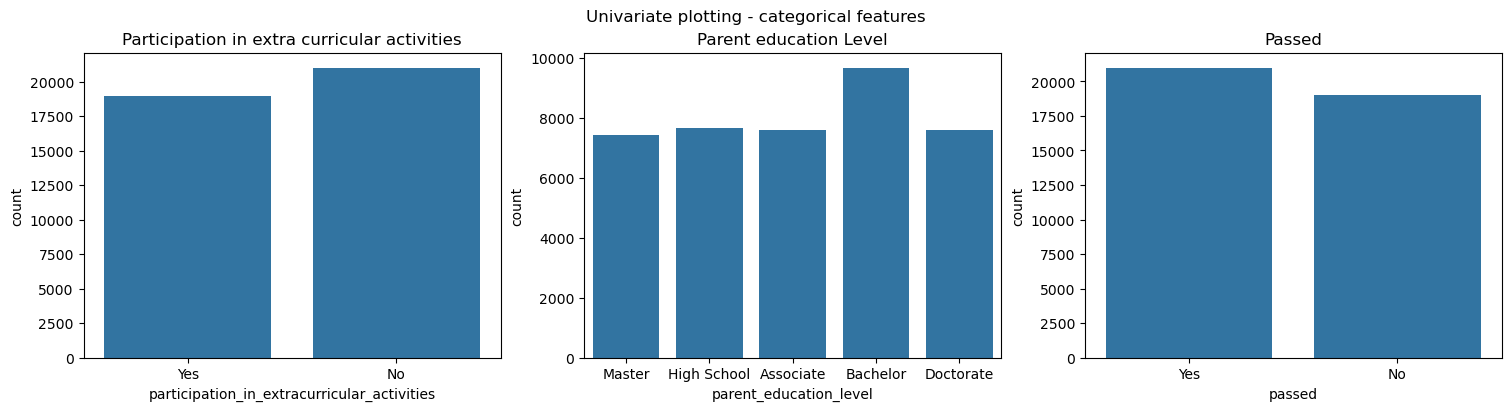

In [ ]:
#Univariate analysis - categorical data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
fig, axs = plt.subplots(1, 3, figsize=(15,4), constrained_layout=True)
fig.suptitle('Univariate plotting - categorical features')

axs[0].set_title('Participation in extra curricular activities')
sns.countplot(data=df, x='participation_in_extracurricular_activities', ax=axs[0])

axs[1].set_title('Parent education Level')
sns.countplot(data=df, x='parent_education_level', ax=axs[1])

axs[2].set_title('Passed')
sns.countplot(data=df, x='passed', ax=axs[2])

plt.show()

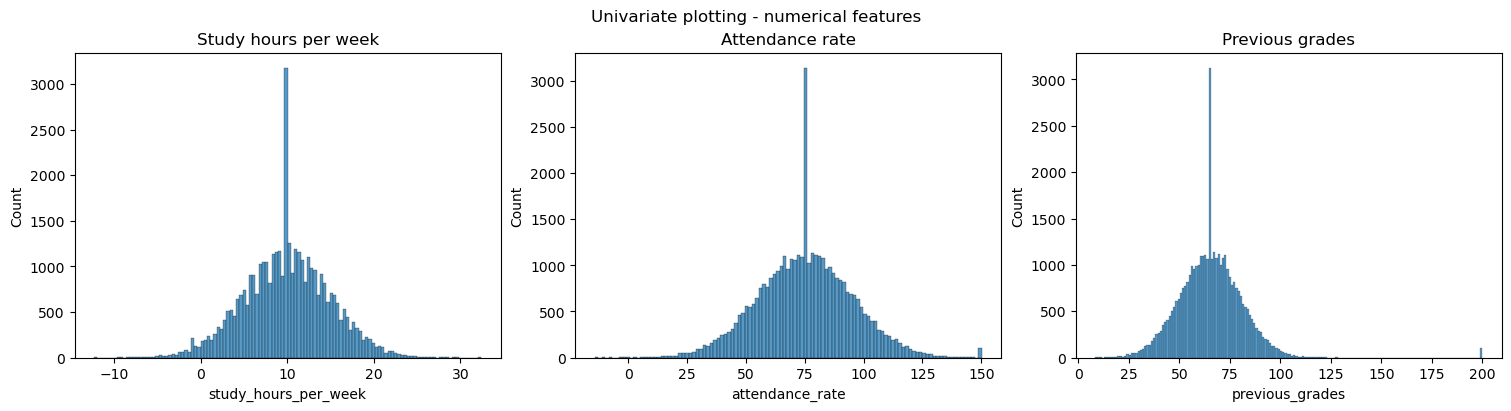

In [ ]:
#univariate analysis - numerical data
fig, axs = plt.subplots(1, 3, figsize=(15,4), constrained_layout=True)
fig.suptitle('Univariate plotting - numerical features')

axs[0].set_title('Study hours per week')
sns.histplot(data=df, x='study_hours_per_week', ax=axs[0])

axs[1].set_title('Attendance rate')
sns.histplot(data=df, x='attendance_rate', ax=axs[1])

axs[2].set_title('Previous grades')
sns.histplot(data=df, x='previous_grades', ax=axs[2])

plt.show()

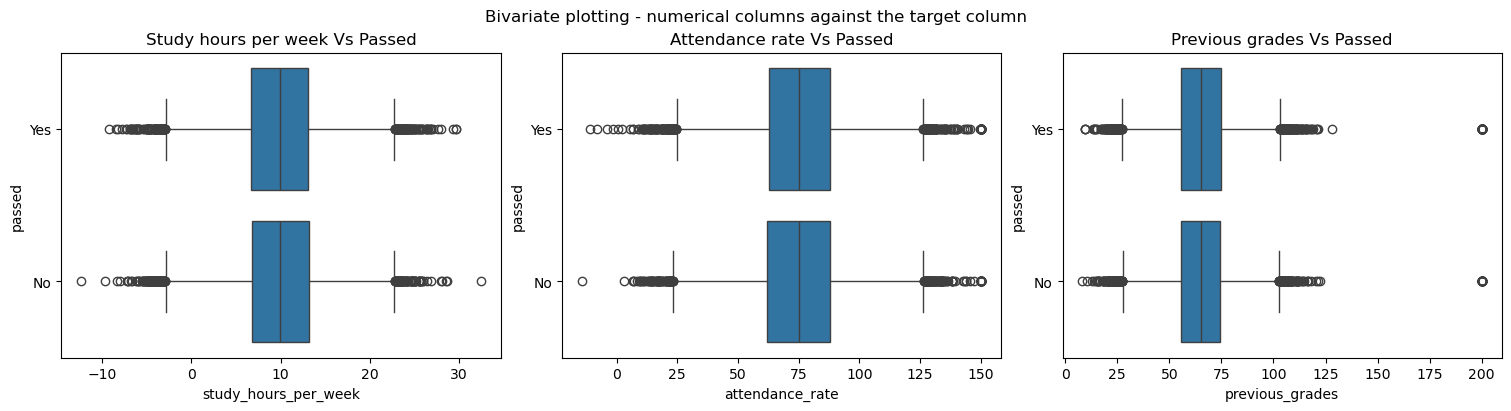

In [ ]:
#bivariate analysis - numerical data vs target column
fig, axs = plt.subplots(1, 3, figsize=(15,4), constrained_layout=True)
fig.suptitle('Bivariate plotting - numerical columns against the target column')

axs[0].set_title('Study hours per week Vs Passed')
sns.boxplot(data=df, x='study_hours_per_week', y='passed', ax=axs[0])

axs[1].set_title('Attendance rate Vs Passed')
sns.boxplot(data=df, x='attendance_rate', y='passed', ax=axs[1])

axs[2].set_title('Previous grades Vs Passed')
sns.boxplot(data=df, x='previous_grades', y='passed', ax=axs[2])

plt.show()

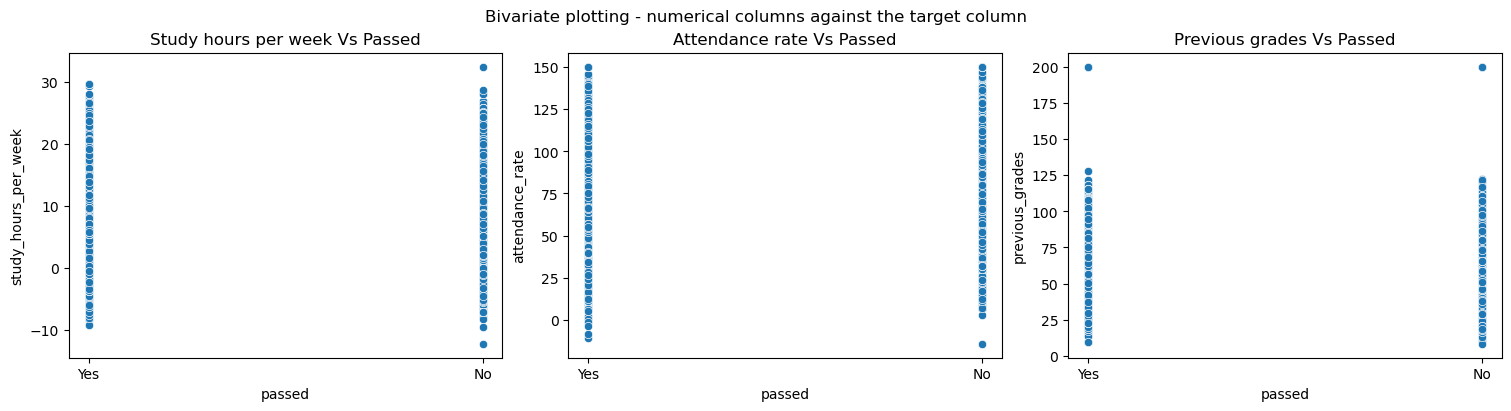

In [ ]:
# bivariate analysis - numerical data vs the target column using scatter plot
fig, axs = plt.subplots(1, 3, figsize=(15,4), constrained_layout=True)
fig.suptitle('Bivariate plotting - numerical columns against the target column')

axs[0].set_title('Study hours per week Vs Passed')
sns.scatterplot(data=df, y='study_hours_per_week', x='passed', ax=axs[0])

axs[1].set_title('Attendance rate Vs Passed')
sns.scatterplot(data=df, y='attendance_rate', x='passed', ax=axs[1])

axs[2].set_title('Previous grades Vs Passed')
sns.scatterplot(data=df, y='previous_grades', x='passed', ax=axs[2])

plt.show()

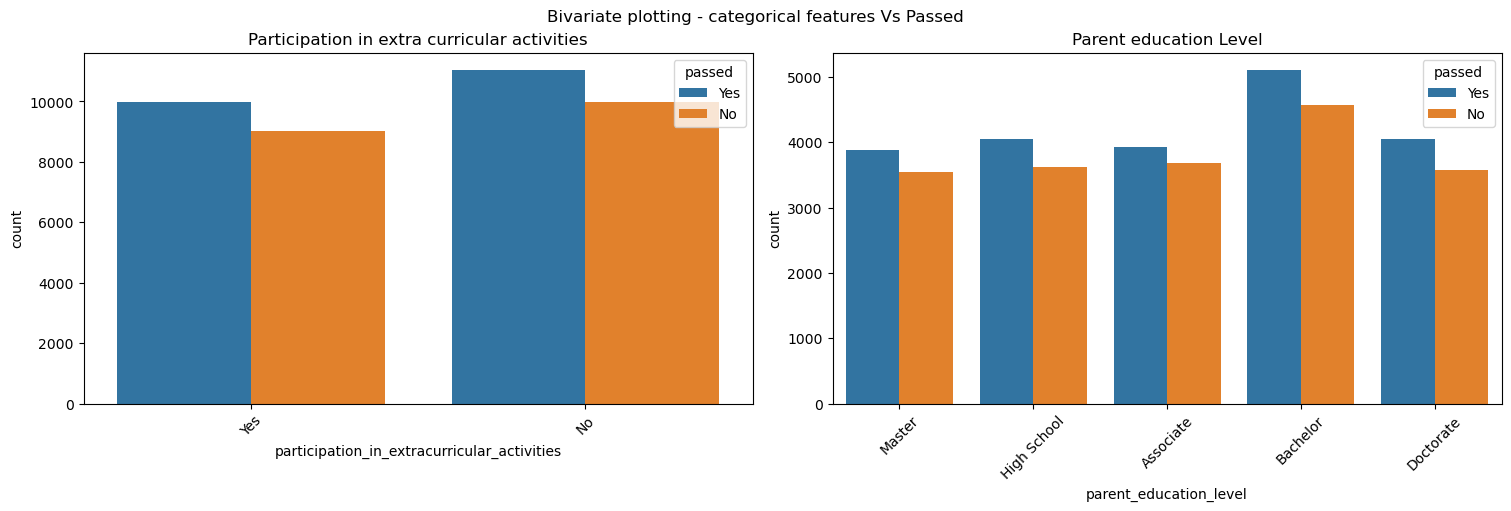

In [ ]:
#distribution of the target value against categorical data
fig, axs = plt.subplots(1, 2, figsize=(15,5), constrained_layout=True)
fig.suptitle('Bivariate plotting - categorical features Vs Passed')

axs[0].set_title('Participation in extra curricular activities')
sns.countplot(data=df, x='participation_in_extracurricular_activities',  hue='passed', ax=axs[0])
axs[0].tick_params(axis='x', rotation=45)

axs[1].set_title('Parent education Level')
sns.countplot(data=df, x='parent_education_level', hue='passed', ax=axs[1])
axs[1].tick_params(axis='x', rotation=45)

plt.show()

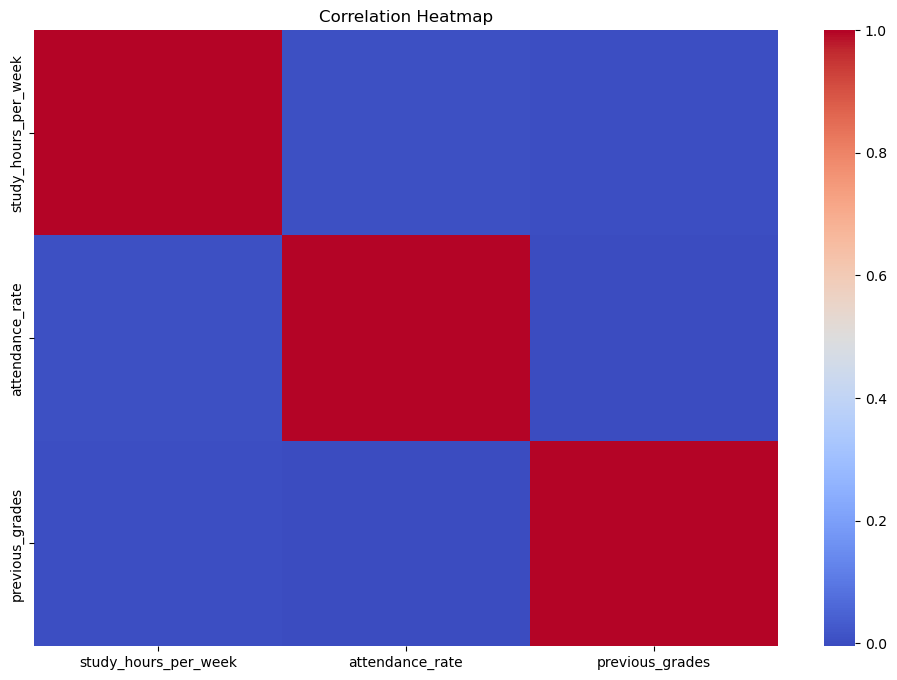

In [ ]:
# correlation between the variables
plt.figure(figsize=(12,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

# MODEL TRAINING

In [ ]:
# assigning the dependent and independent variable
X = df.drop(columns=['passed'])
y = df['passed']

In [ ]:
# seperating the object data from numerical data
X_num = X.select_dtypes(include=[np.number])
X_cat = X.select_dtypes(include='object')

In [ ]:
# standardising the numerical data
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

scaler = StandardScaler()
le = LabelEncoder()

X_num_scaled = pd.DataFrame(scaler.fit_transform(X_num), columns=scaler.get_feature_names_out(),index=X_num.index)
X_num_scaled.describe().round(2)

,study_hours_per_week,attendance_rate,previous_grades
count,40000.00,40000.00,40000.00
mean,0.00,0.00,0.00
std,1.00,1.00,1.00
min,-4.54,-4.51,-3.55
25%,-0.64,-0.65,-0.61
50%,0.00,0.00,0.00
75%,0.66,0.64,0.57
max,4.58,3.77,8.36


In [ ]:
# mapping the categorical features to numerical values
X_cat['participation_in_extracurricular_activities'] = X_cat['participation_in_extracurricular_activities'].map({'Yes': 1, 'No': 0})
X_cat['parent_education_level'] = X_cat['parent_education_level'].map({'High School': 1, 'Bachelor': 2, 'Master': 3, 'Associate': 4, 'Doctorate': 5})

In [ ]:
X_cat

,participation_in_extracurricular_activities,parent_education_level
0,1,3
1,0,1
2,0,4
3,1,2
4,0,3
...,...,...
39995,1,3
39996,0,5
39997,0,2
39998,1,3


In [ ]:
3 combining the independent data back 
X_transformed = pd.concat([X_num,X_cat], axis=1)

In [ ]:
#mapping the dependent feature
y = y.map({'Yes': 1, 'No': 0})

In [ ]:
y

0        1
1        0
2        0
3        0
4        0
        ..
39995    0
39996    1
39997    0
39998    0
39999    1
Name: passed, Length: 40000, dtype: int64

In [ ]:
# split the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_transformed,y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# load the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
# train the model
model.fit(X_train,y_train)

LogisticRegression()

# PREDICTION

In [ ]:
# prediction
y_pred = model.predict(X_test)

In [ ]:
#evaluate the model
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score
print("Accuracy", accuracy_score(y_pred,y_test))
print("Precision", precision_score(y_pred,y_test))
print("Recall", recall_score(y_pred,y_test))
print("F1", f1_score(y_pred,y_test))


Accuracy 0.525375
Precision 0.9992860542598763
Recall 0.525334667834355
F1 0.6886428864288643


In [ ]:
# dump the model in pkl form
import pickle
with open('studentperformance.pkl', 'wb') as file:
    pickle.dump(model, file)

In [ ]:
with open('studentperformance.pkl', 'rb') as file:
    loaded_model = pickle.load